# **Import Library Yang Dibutuhkan**

In [5]:
!pip install tweet-preprocessor
!pip install google_trans_new
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk

In [6]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Tweet Crawling**

Mengambil Data Dari Post Tweet Dari Twitter Menggunakan API Twitter

In [7]:
consumer_key = "T1lfLLj8Csy6hVWniInr8E21S"
consumer_secret = "zdWyOB28A3NQGfCA0OULZKt37IHWy6IqWvfi5xzodPwKB65kZ0"
access_token = "886237353366376448-fjm0ghiJrMtEp4YUDwY5kjUseeA9g7z"
access_token_secret = "RJ2AIPJ3WyPbWUeLZEdDvlEoMGQx7u9Us7AwUBLIDhCwM"


In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def scraptweets(search_words, date_since, date_until):

    db_tweets = pd.DataFrame(columns=['username', 'tweetcreatedts', 'text'])

    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(1000)

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        ith_tweet = [username, tweetcreatedts, text]

        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'omicron.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(7)
last_week = last_week.strftime("%Y-%m-%d")

last_month = datetime.today() - timedelta(30)
last_month = last_month.strftime("%Y-%m-%d")

search_words = "#Omicron OR #OmicronVarient OR #OmicronArtmadanOnline OR #Omicronindia OR #covid19omicron OR #virusomicron"
date_since = last_month
date_until = today

scraptweets(search_words, date_since, date_until)

In [10]:
data = pd.read_csv('omicron.csv')
data.head(10)

,username,tweetcreatedts,text
0,__aichaaa,2021-12-16 23:59:47,"Omicron sudah ditemukan di Indonesia, jangan p..."
1,rdkxogus,2021-12-16 23:59:46,"Omicron sudah ditemukan di Indonesia, jangan p..."
2,kjokkn,2021-12-16 23:59:42,"Namun, disisi lain.. ringannya gejala #omicron..."
3,doddooo7,2021-12-16 23:59:36,"Omicron sudah ditemukan di Indonesia, jangan p..."
4,breeze_moment,2021-12-16 23:59:25,"Omicron sudah ditemukan di Indonesia, jangan p..."
5,manjikro,2021-12-16 23:59:24,"Namun, disisi lain.. ringannya gejala #omicron..."
6,manjikro,2021-12-16 23:59:15,Data menunjukkan puncak grafik #omicron bisa d...
7,manjikro,2021-12-16 23:59:08,Saat ini lebih dari 4000 pasien #omicron di ra...
8,manjikro,2021-12-16 23:58:50,Jumlah kasus #omicron di Afrika Selatan juga s...
9,violetaaday,2021-12-16 23:58:49,"Omicron sudah ditemukan di Indonesia, jangan p..."


In [11]:
data.sample(n=5)

,username,tweetcreatedts,text
950,heydianac,2021-12-16 17:18:14,"Omicron sudah ditemukan di Indonesia, jangan p..."
476,raden_hayati,2021-12-16 22:13:30,"Namun, disisi lain.. ringannya gejala #omicron..."
360,lsvl_lla,2021-12-16 22:51:08,"Omicron sudah ditemukan di Indonesia, jangan p..."
643,ruangyellow,2021-12-16 20:20:33,"Omicron sudah ditemukan di Indonesia, jangan p..."
305,maendzr,2021-12-16 23:04:35,"Omicron sudah ditemukan di Indonesia, jangan p..."


# **Pembersihan Data (Wrangle/Cleaning Data)**

In [12]:
data.isnull().sum()

username          0
tweetcreatedts    0
text              0
dtype: int64

In [13]:
import googletrans
from googletrans import Translator
from googletrans import LANGUAGES

def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

data.to_csv("D:\\KULIAH\\Semester 5\\Analisis Big Data\\UAS\\omicron\\omicron_preprocessing.csv", header=True, index=False)

In [14]:
translator = Translator()

# df = pd.read_csv("omicron_preprocessing.csv", encoding='latin-1')
data.columns = ['username','tweetcreatedts','text','tweet_clean']
# print(df)

tweet_english = []

for element in data['tweet_clean']:
    tweet_english.append(translator.translate(element).text)

# print(tweet_english)

data['tweet_english'] = tweet_english

data.to_csv("D:\\KULIAH\\Semester 5\\Analisis Big Data\\UAS\\omicron\\omicron_english.csv", header=True, index=False)



In [15]:
data.head(10)

,username,tweetcreatedts,text,tweet_clean,tweet_english
0,__aichaaa,2021-12-16 23:59:47,"Omicron sudah ditemukan di Indonesia, jangan p...","Omicron sudah ditemukan di Indonesia, jangan p...","Omicron has been found in Indonesia, don't pan..."
1,rdkxogus,2021-12-16 23:59:46,"Omicron sudah ditemukan di Indonesia, jangan p...","Omicron sudah ditemukan di Indonesia, jangan p...","Omicron has been found in Indonesia, don't pan..."
2,kjokkn,2021-12-16 23:59:42,"Namun, disisi lain.. ringannya gejala #omicron...","Namun, disisi lain.. ringannya gejala dan penu...","However, on the other hand ... the symptoms of..."
3,doddooo7,2021-12-16 23:59:36,"Omicron sudah ditemukan di Indonesia, jangan p...","Omicron sudah ditemukan di Indonesia, jangan p...","Omicron has been found in Indonesia, don't pan..."
4,breeze_moment,2021-12-16 23:59:25,"Omicron sudah ditemukan di Indonesia, jangan p...","Omicron sudah ditemukan di Indonesia, jangan p...","Omicron has been found in Indonesia, don't pan..."
5,manjikro,2021-12-16 23:59:24,"Namun, disisi lain.. ringannya gejala #omicron...","Namun, disisi lain.. ringannya gejala dan penu...","However, on the other hand ... the symptoms of..."
6,manjikro,2021-12-16 23:59:15,Data menunjukkan puncak grafik #omicron bisa d...,Data menunjukkan puncak grafik bisa dicapai da...,Data shows the peak of the graph can be achiev...
7,manjikro,2021-12-16 23:59:08,Saat ini lebih dari 4000 pasien #omicron di ra...,Saat ini lebih dari pasien di rawat di RS Afri...,At present more than patients are treated at S...
8,manjikro,2021-12-16 23:58:50,Jumlah kasus #omicron di Afrika Selatan juga s...,Jumlah kasus di Afrika Selatan juga sudah menc...,The number of cases in South Africa has also r...
9,violetaaday,2021-12-16 23:58:49,"Omicron sudah ditemukan di Indonesia, jangan p...","Omicron sudah ditemukan di Indonesia, jangan p...","Omicron has been found in Indonesia, don't pan..."


In [16]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['tweet_english'] = data['tweet_english'].apply(stemming_data)


In [17]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'Positif'
    elif polaritas > 0.0 == 0.0:
        return 'Netral'
    else:
        return 'Negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 

status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 109
Netral = 29
Negatif = 862

Total Data : 1000


In [18]:
dataset = data.drop(['username',	'tweetcreatedts',	'text', 'tweet_clean'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else: 
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [19]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.915


In [20]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 

status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 101
Netral = 114
Negatif = 785

Total Data : 1000


# **Visualisasi Data**

In [21]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                    textprops=dict(color="w"))

    ax.legend(wedges, labels,
            title= legend_title,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

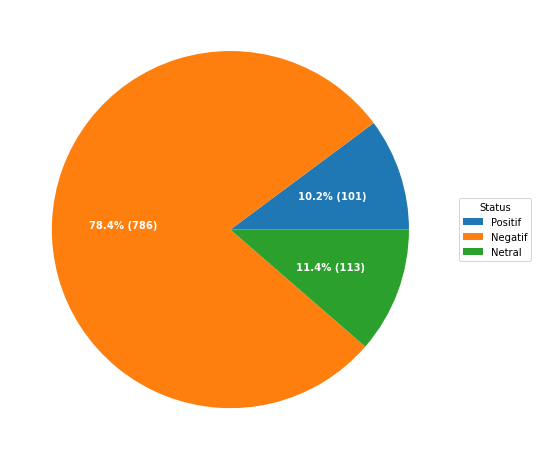

In [22]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [23]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

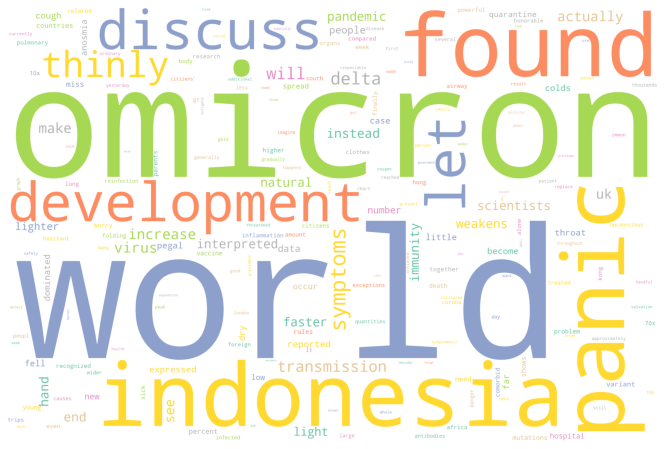

In [24]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

## **Data Klasifikasi Yang Diubah Setelah Menggunakan Metode Naive Bayes Classifier**

In [25]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if n[5] != n[6]:
        print(f'Text: {n[3]}\nClassifier: {n[5]}\nClassifier Bayes: {n[6]} \n')

Text: Namun, disisi lain.. ringannya gejala dan penularan yg lebih cepat malah diartikan beberapa ilmuwan ini merupakan akhir dari pandemi, karena virus melemah dan malah akan membuat peningkatan kekebalan alami.. kita lihat saja bagaimana di UK ya..
Classifier: Negatif
Classifier Bayes: Netral 

Text: Namun, disisi lain.. ringannya gejala dan penularan yg lebih cepat malah diartikan beberapa ilmuwan ini merupakan akhir dari pandemi, karena virus melemah dan malah akan membuat peningkatan kekebalan alami.. kita lihat saja bagaimana di UK ya..
Classifier: Negatif
Classifier Bayes: Netral 

Text: Jumlah kasus di Afrika Selatan juga sudah mencapai persen. Menggantikan Delta. Lambat laun Omicron akan menyebar ke seluruh Dunia. Kita lihat saja UK dalam beberapa hari sudah menjadi puluhan ribu kasus. persen varian di London saat ini sudah Omicron.
Classifier: Negatif
Classifier Bayes: Netral 

Text: Terkait , apakah Indonesia kecolongan lagi?Bagaimana tidak kecolongan, aturan karantina perja